In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import mahotas

from PIL import Image

pd.set_option('display.max_columns', None)

In [5]:
import win32file

print(win32file._getmaxstdio())

8000


In [6]:
win32file._setmaxstdio(8000)

8000

In [102]:
#ustawienie jednego rozmiaru dla wsyztskich plików
for filename in glob.iglob('*.jpg'):
    im = Image.open(filename)
    imResize = im.resize((112,112), Image.ANTIALIAS)
    imResize.save(filename , 'JPEG', quality=90)

In [3]:
# lista plików z kotami
cats_list = []
for filename in glob.glob('train/cat1/*.jpg'):
    im = Image.open(filename)
    cats_list.append(im)

In [4]:
#lista plików z psami
dogs_list = []
for filename in glob.glob('train/dog1/*.jpg'):
    im = Image.open(filename)
    dogs_list.append(im)

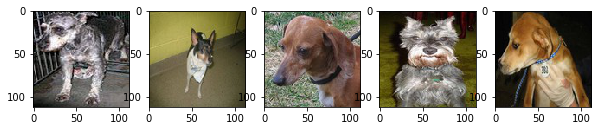

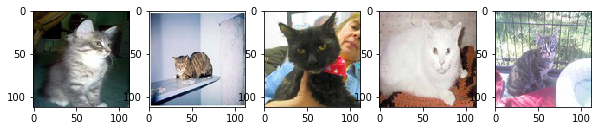

In [5]:
# jak widać przy użyciu sklearn może nie być łatwo!
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (10,10))
im1 = ax1.imshow(np.asarray(dogs_list[1]));
im2 = ax2.imshow(np.asarray(dogs_list[2]));
im3 = ax3.imshow(np.asarray(dogs_list[11]));
im4 = ax4.imshow(np.asarray(dogs_list[5]));
im5 = ax5.imshow(np.asarray(dogs_list[6]));

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (10,10))
im1 = ax1.imshow(np.asarray(cats_list[1]));
im2 = ax2.imshow(np.asarray(cats_list[2]));
im3 = ax3.imshow(np.asarray(cats_list[0]));
im4 = ax4.imshow(np.asarray(cats_list[16]));
im5 = ax5.imshow(np.asarray(cats_list[6]));

In [96]:
# chodzi o pih=gmetacja i połozenia pikseli
def fd_hu_moments(image):
    image = np.asarray(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

# chodiz o teksturę, ile razy piksle przyjmuje jakąś wartośc obok innego pikslea o jakiejś wartości
def fd_haralick(image):
    image = np.asarray(image)
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

def fd_histogram(image, mask=None):
    image = np.asarray(image)
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [5,5,5],[0, 256, 0, 256, 0, 256])
    # normalize the histogram00
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()


In [99]:
cats_frame = pd.DataFrame()                                   
for cat in cats_list:
    fv_hu_moments = fd_hu_moments(cat)
    fv_haralick   = fd_haralick(cat)
    fv_histogram  = fd_histogram(cat)
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    df = pd.DataFrame(data=global_feature.flatten())
    df = df.transpose()
    cats_frame = cats_frame.append(df, ignore_index = True)
    
cats_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0.082958,0.034508,0.076335,0.039039,0.467072,0.020217,0.014988,0.043919,0.078775,0.178812,0.004183,0.002091,0.008017,0.037645,0.064832,0.004531,0.000000,0.001046,0.005577,0.003486,0.002788,0.000000,0.0,0.0,0.0,0.562927,0.402240,0.118162,0.053330,0.150230,0.189269,0.260724,0.104568,0.035553,0.081215,0.040085,0.035205,0.024399,0.046707,0.025794,0.005926,0.005577,0.008714,0.003834,0.000349,0.001743,0.000697,0.002091,0.000349,0.000000,0.036599,0.024399,0.003137,0.019868,0.052284,0.047056,0.040782,0.012200,0.017777,0.094112,0.021611,0.055421,0.097249,0.145002,0.067621,0.006971,0.013594,0.071107,0.090626,0.026839,0.002091,0.002440,0.005577,0.028233,0.019868,0.005926,0.002788,0.001394,0.000697,0.019868,0.004531,0.002440,0.000000,0.000000,0.0,0.001743,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000415,383.490987,0.967550,5909.718002,0.177736,229.251830,23255.381019,8.696745,12.475775,0.000210,4.830480,-0.381567,0.998555,0.001683,1.495424e-08,1.079197e-10,1.386245e-10,-1.690130e-20,-1.573190e-14,-1.354486e-21
1,0.123790,0.247967,0.429010,0.248741,0.182590,0.189554,0.298644,0.011218,0.000000,0.000000,0.354736,0.200385,0.000000,0.000000,0.000000,0.087427,0.001161,0.000000,0.000000,0.000000,0.008124,0.000000,0.0,0.0,0.0,0.044100,0.040619,0.106382,0.200772,0.214699,0.192648,0.100579,0.000000,0.000000,0.000000,0.301352,0.116440,0.000000,0.000000,0.000000,0.139264,0.080077,0.000000,0.000000,0.000000,0.101353,0.027079,0.000000,0.000000,0.000000,0.034429,0.096324,0.115666,0.098645,0.059961,0.044100,0.008897,0.000000,0.000000,0.000000,0.031334,0.005029,0.000000,0.000000,0.000000,0.038684,0.005416,0.000000,0.000000,0.000000,0.081237,0.006963,0.000000,0.000000,0.000000,0.017021,0.069632,0.026692,0.007737,0.013926,0.010445,0.000000,0.000000,0.000000,0.0,0.001161,0.000000,0.0,0.0,0.0,0.005416,0.000000,0.0,0.0,0.0,0.025145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000412,241.221829,0.974367,4703.036064,0.197486,175.016493,18570.922429,8.633706,12.299286,0.000241,4.584286,-0.394293,0.998761,0.001324,7.566016e-08,4.780943e-11,3.217643e-11,-1.100550e-21,-3.883420e-15,6.176281e-22
2,0.000530,0.001942,0.022419,0.304331,0.839204,0.001236,0.009179,0.065668,0.246783,0.010768,0.001059,0.012886,0.021536,0.004413,0.000000,0.003531,0.009003,0.000883,0.000000,0.000000,0.016064,0.003531,0.0,0.0,0.0,0.000530,0.001412,0.003884,0.001765,0.018535,0.000000,0.001059,0.001589,0.001059,0.000706,0.000000,0.000353,0.001942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000530,0.000000,0.000000,0.000000,0.000000,0.000706,0.012710,0.019418,0.015181,0.024008,0.001589,0.010415,0.051722,0.040954,0.007061,0.000883,0.002471,0.007414,0.001589,0.000000,0.000353,0.000177,0.000000,0.000000,0.000000,0.000353,0.000000,0.000000,0.000000,0.000000,0.000706,0.003707,0.003531,0.036188,0.358524,0.001236,0.000530,0.000000,0.000000,0.0,0.000706,0.000177,0.0,0.0,0.0,0.001765,0.000177,0.0,0.0,0.0,0.001765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000787,624.997098,0.869008,2388.382753,0.268696,370.748915,8928.533913,8.248842,11.647299,0.000340,4.529144,-0.403953,0.998448,0.000877,7.046293e-10,2.752634e-12,1.438288e-12,-1.621212e-24,-3.697424e-17,2.358327e-24
3,0.101670,0.159927,0.208382,0.144243,0.002521,0.039492,0.032490,0.001961,0.

In [100]:
dogs_frame = pd.DataFrame()                                   
for dog in dogs_list:
    fv_hu_moments = fd_hu_moments(dog)
    fv_haralick   = fd_haralick(dog)
    fv_histogram  = fd_histogram(dog)
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    df = pd.DataFrame(data=global_feature.flatten())
    df = df.transpose()
    dogs_frame = dogs_frame.append(df, ignore_index = True)
    
dogs_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0.021149,0.269241,0.217182,0.152651,0.267885,0.005423,0.027927,0.008405,0.000542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.004338,0.020607,0.015184,0.024945,0.310725,0.001356,0.002169,0.024402,0.002983,0.000813,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0,0.0,0.076461,0.265174,0.076732,0.197118,0.687336,0.026843,0.037417,0.063446,0.004338,0.000813,0.000271,0.004880,0.007863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.081070,0.242669,0.114149,0.075105,0.038502,0.015455,0.007050,0.000542,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001054,489.195000,0.958534,5899.808461,0.178615,303.864814,23110.038842,8.518143,12.382911,0.000184,5.005943,-0.360542,0.997773,0.001127,2.316988e-09,1.898726e-12,3.430921e-11,-1.846270e-23,-6.127995e-16,-2.762994e-22
1,0.001030,0.019570,0.039758,0.002472,0.002884,0.000206,0.006180,0.008652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.000000,0.038316,0.147908,0.016068,0.014214,0.000206,0.005356,0.003296,0.002884,0.000206,0.000000,0.000412,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0,0.0,0.002266,0.053766,0.285311,0.268007,0.255029,0.002266,0.026162,0.219803,0.803196,0.237519,0.000206,0.002678,0.022454,0.028016,0.005562,0.000000,0.001854,0.004326,0.000824,0.000000,0.000000,0.000412,0.000000,0.0,0.0,0.000618,0.019158,0.023896,0.006592,0.003914,0.000000,0.000618,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000232,371.507725,0.863693,1361.937841,0.104365,282.515403,5076.243641,8.134303,12.591383,0.000143,5.124878,-0.253269,0.986426,0.001166,1.748500e-12,6.773200e-13,7.066792e-13,4.823649e-25,-8.681938e-19,7.974130e-26
2,0.008034,0.005624,0.022495,0.144340,0.040972,0.008034,0.001875,0.000803,0.000536,0.000000,0.006695,0.000000,0.000000,0.000000,0.000000,0.006159,0.00000,0.000000,0.000000,0.000000,0.001339,0.0000,0.0,0.0,0.0,0.013390,0.010979,0.000268,0.000000,0.000000,0.013390,0.000803,0.004820,0.002678,0.000268,0.003749,0.000536,0.002142,0.000536,0.00000,0.001607,0.000000,0.00000,0.00000,0.00000,0.001607,0.00000,0.00000,0.0,0.0,0.004017,0.051952,0.396065,0.240477,0.207271,0.006695,0.052487,0.397939,0.554866,0.066145,0.002946,0.017139,0.157462,0.205129,0.002678,0.001607,0.002678,0.000536,0.000000,0.000000,0.001071,0.000000,0.000000,0.0,0.0,0.001875,0.012318,0.197899,0.348933,0.118900,0.002410,0.002410,0.000000,0.0,0.0,0.001339,0.000000,0.0,0.0,0.0,0.000268,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000411,234.569980,0.935430,1817.978316,0.192172,276.315982,7037.343284,8.211048,11.958519,0.000307,4.411803,-0.353147,0.996634,0.001204,1.083041e-08,1.022480e-11,9.715944e-12,8.562776e-23,8.633554e-16,4.523141e-23
3,0.061320,0.160860,0.285599,0.333059,0.441419,0.122640,0.143640,0.065520,0.057540,0.197819,0.102900,0.064260,0.007980,0.000000,0.002940,0.047460,0.01218,0.000000,0.000000,0.000000,0.03